# MINST Classification KNN (Centroid Approach)

- this notebook will use MINST dataset of handwritten digIts from one to 9 
- we will use only 10000 data-point for training and 1000 data-point for test as asked

#### Essintial imports 

In [160]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
print(tf.__version__)
print(keras.__version__)


1.15.0
2.2.4-tf


#### importing preprocessed data from keras  

In [2]:
from keras.datasets import mnist 
(xtrain , y_train) , (xtest,y_test) = mnist.load_data()

Using TensorFlow backend.


In [3]:
print("Train samples:", xtrain.shape, y_train.shape)
print("Test samples:", xtest.shape, y_test.shape)

Train samples: (60000, 28, 28) (60000,)
Test samples: (10000, 28, 28) (10000,)


##### taking small portion as asked 

In [4]:
xtrain=xtrain[50000:]
y_train=y_train[50000:]
xtest=xtest[9000:]
y_test=y_test[9000:]

In [5]:
print("Train samples:", xtrain.shape, y_train.shape)
print("Test samples:", xtest.shape, y_test.shape)

Train samples: (10000, 28, 28) (10000,)
Test samples: (1000, 28, 28) (1000,)


##### plotting digits in grey scale just for illustration 

1
6
9
7
0
6
7
6
1
4


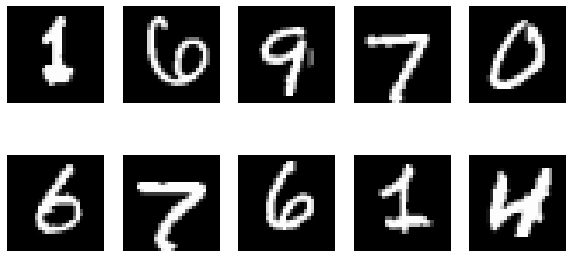

In [20]:
cols = 5
rows = 2
fig = plt.figure(figsize=(2 * cols , 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, 1000)
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(xtrain[random_index, :] ,cmap='gray')
        print(y_train[random_index])
plt.show()

#### Imaged_grid is function that slice the photo into certain amount of grids 

In [55]:
def imaged_grid(img , row , col ):

    x , y = img.shape
    return (img.reshape ( x //row, row, -1, col)
            .swapaxes(1,2).
            reshape(-1, row, col))
#not my work TBH:)

(16, 7, 7)


array([[[  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0]],

       [[  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0]],

       [[  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,  17,  80, 104],
        [  0,   0,   0,   0,  53, 253, 253]],

       [[  0,   0,   0,   0,   0,   0,   0],
    

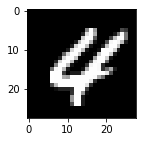

In [56]:
fig = plt.figure(figsize=(2 * 1 , 3 * 1 - 1))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(xtest[8] ,cmap='gray')
print(imaged_grid(xtest[4] , 7, 7 ).shape)
imaged_grid(xtest[5] , 7 , 7 )




#### Get the centroid (centet of mass of grey scale) of each slice (grid) made

In [92]:
def get_centroid(img):
    feature_vector = []
    for grid in imaged_grid(img , 7 , 7 ) :
        
        Xc = 0 
        Yc = 0 
        sum = 0
    
        for index, x in np.ndenumerate(grid):
          sum+= x 
          Xc += x * index[0]
          Yc += x * index[1]
        
        if sum != 0 :
            feature_vector.append( Xc/ sum )
            feature_vector.append(Yc/ sum )
        else :
             feature_vector.append(0)
             feature_vector.append(0)
        
    
    return np.array(feature_vector)


#### extracting train and test features using previous funcution 

In [93]:
train_features = [get_centroid(img)  for img in xtrain  ]
train_features = np.array (train_features)
train_features.shape

(10000, 32)

In [94]:
test_features = [get_centroid(img)  for img in xtest]
test_features = np.array (test_features)
test_features.shape

(1000, 32)

### Fitting feature using KNeighborsClassifier using ecludian distance then predict using Accuracy metric 

In [114]:
model = KNeighborsClassifier(4 , metric = 'euclidean')
model.fit (train_features , y_train)
ypred = model.predict(test_features)

In [115]:
print("accuracy=", accuracy_score(y_test, ypred) )

accuracy= 0.855
